In [1]:
import pandas as pd
import numpy as np
import re

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

import nltk
import string
nltk.download('maxent_ne_chunker')
nltk.download('words')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\lingadhar_duggirala\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\lingadhar_duggirala\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package words is already up-to-date!


In [28]:
patient_data=pd.read_excel("C:\\Users\\lingadhar_duggirala\\Desktop\\ML Projects\\lingadhar_cluster_labels.xlsx")

In [5]:
patient_data.shape

(9340, 11)

In [6]:
patient_data.head(3)

,EMR_CODE,CLCTBE_FEILD_VALUE1,OPRREGTAA_SEX,OPRREGTAA_AGE,OPRREGTAA_AGE_DAYS,OPRREGTAA_AGE_MONTHS,OPRREGTAA_IS_HCV,OPRREGTAA_IS_HBSAG,OPRRREGTAA_IS_ARF,OPRRREGTAA_IS_HIV_POS,label
0,A00000015,i35.1 aortic (valve) insufficiency,0,19,3.0,4.0,0,0,0,0,3
1,A00000624,i10 essential (primary) hypertension,1,50,15.0,0.0,0,0,0,0,2
2,A00000794,i50 heart failure,1,41,0.0,0.0,0,0,0,0,5


In [40]:
patient_data[patient_data.OPRREGTAA_IS_HCV==1]

,EMR_CODE,CLCTBE_FEILD_VALUE1,OPRREGTAA_SEX,OPRREGTAA_AGE,OPRREGTAA_AGE_DAYS,OPRREGTAA_AGE_MONTHS,OPRREGTAA_IS_HCV,OPRREGTAA_IS_HBSAG,OPRRREGTAA_IS_ARF,OPRRREGTAA_IS_HIV_POS,label


In [24]:
patient_data.CLCTBE_FEILD_VALUE1[6]

' 2.ecg 190719 1.echo 190719 i10 essential primary hypertension bp 115 74 pulse 79 currenlty losartan hct known hypertensiv eon medication echo mod lvh ef 59 ambulatory bp normal'

In [29]:
def text_preprocess(txt):
    txto=""
    txt=re.sub("[^a-zA-Z0-9.]"," ",txt)
    txt=re.sub("\s+"," ",txt)
    txt=txt.lower()
    for w in txt.split():
        if not w.isdigit():
            if not w in stop_words:
                txto+=" "+w
    return txto

In [30]:
patient_data.CLCTBE_FEILD_VALUE1=patient_data.CLCTBE_FEILD_VALUE1.apply(lambda x:text_preprocess(x))

In [31]:
words=set()
for ind,row in patient_data.iterrows():
    for w in row['CLCTBE_FEILD_VALUE1'].split():
        words.add(w)
len(words)

25617

In [32]:
vect_word = TfidfVectorizer(max_features=27000, lowercase=True, analyzer='word',
                        stop_words= 'english',ngram_range=(2,5),dtype=np.float32)
textvector = vect_word.fit_transform(patient_data['CLCTBE_FEILD_VALUE1'])

In [35]:
df=pd.DataFrame(textvector.toarray(), columns=vect_word.get_feature_names())

In [41]:
patient_data.columns

Index(['EMR_CODE', 'CLCTBE_FEILD_VALUE1', 'OPRREGTAA_SEX', 'OPRREGTAA_AGE',
       'OPRREGTAA_AGE_DAYS', 'OPRREGTAA_AGE_MONTHS', 'OPRREGTAA_IS_HCV',
       'OPRREGTAA_IS_HBSAG', 'OPRRREGTAA_IS_ARF', 'OPRRREGTAA_IS_HIV_POS',
       'label'],
      dtype='object')

In [42]:
patient_data=patient_data[['EMR_CODE', 'CLCTBE_FEILD_VALUE1', 'OPRREGTAA_SEX', 'OPRREGTAA_AGE',
       'OPRREGTAA_AGE_DAYS', 'OPRREGTAA_AGE_MONTHS']]

In [43]:
patient_fin_df=pd.concat([patient_data,df],axis=1)

In [44]:
patient_fin_df.head(3)

,EMR_CODE,CLCTBE_FEILD_VALUE1,OPRREGTAA_SEX,OPRREGTAA_AGE,OPRREGTAA_AGE_DAYS,OPRREGTAA_AGE_MONTHS,00 blood,00 blood count,00 blood count differential,0011 00,...,z95 presence prosthetic heart,z95 presence prosthetic heart valve,zawadi edward,zawadi edward kalezi,zawadi edward kalezi consultant,zawadi edward kalezi consultant naizihijwa,zofenopril calcium,zofenopril calcium na,zofenopril calcium na 30days,zofenopril calcium na 30days oral
0,A00000015,i35.1 aortic valve insufficiency,0,19,3.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A00000624,i10 essential primary hypertension,1,50,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A00000794,i50 heart failure,1,41,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
patient_fin_df=pd.get_dummies(patient_fin_df,columns=['OPRREGTAA_SEX'])

In [46]:
patient_fin_df.head(3)

,EMR_CODE,CLCTBE_FEILD_VALUE1,OPRREGTAA_AGE,OPRREGTAA_AGE_DAYS,OPRREGTAA_AGE_MONTHS,00 blood,00 blood count,00 blood count differential,0011 00,0011 00 blood,...,zawadi edward,zawadi edward kalezi,zawadi edward kalezi consultant,zawadi edward kalezi consultant naizihijwa,zofenopril calcium,zofenopril calcium na,zofenopril calcium na 30days,zofenopril calcium na 30days oral,OPRREGTAA_SEX_0,OPRREGTAA_SEX_1
0,A00000015,i35.1 aortic valve insufficiency,19,3.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,A00000624,i10 essential primary hypertension,50,15.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,A00000794,i50 heart failure,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [56]:
patient_fin_df.iloc[:,3:5].isnull().sum()

OPRREGTAA_AGE_DAYS      200
OPRREGTAA_AGE_MONTHS    198
dtype: int64

In [57]:
patient_fin_df[patient_fin_df.OPRREGTAA_AGE_DAYS.isnull()]

,EMR_CODE,CLCTBE_FEILD_VALUE1,OPRREGTAA_AGE,OPRREGTAA_AGE_DAYS,OPRREGTAA_AGE_MONTHS,00 blood,00 blood count,00 blood count differential,0011 00,0011 00 blood,...,zawadi edward,zawadi edward kalezi,zawadi edward kalezi consultant,zawadi edward kalezi consultant naizihijwa,zofenopril calcium,zofenopril calcium na,zofenopril calcium na 30days,zofenopril calcium na 30days oral,OPRREGTAA_SEX_0,OPRREGTAA_SEX_1
2286,J00002016,age family hx dilated cardiomyopathy hx hyper...,50,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2327,J00002623,seen pt dilated cardiomyopathy ckd dialysis t...,53,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2726,J00007204,echo stable age bp cardiomyopathy h htn follo...,60,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
5032,J00029814,htn dilated cardiomyopathy i42.0 htn htn medi...,85,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
5079,J00030199,dcm dilated cardiomyopathy i42.0 htn htn hx r...,70,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
5132,J00030531,dcm dilated cardiomyopathy i42.0 dcm dcm know...,69,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
5133,J00030540,severe pain operated site discoloration swell...,17,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
5233,J00031073,2.med gabapentin mg tab na 30days oral mouth ...,38,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
5261,J00031130,i10 essential primary hypertension,68,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
5292,J00031196,2.echo 1.ecg i34.0 mitral valve insufficiency...,35,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [59]:
patient_fin_df.OPRREGTAA_AGE_DAYS.fillna(patient_fin_df.OPRREGTAA_AGE_DAYS.mean(),inplace=True)

In [62]:
patient_fin_df.OPRREGTAA_AGE_MONTHS.fillna(patient_fin_df.OPRREGTAA_AGE_MONTHS.mean(),inplace=True)

In [63]:
patient_fin_df.iloc[:,3:5].isnull().sum()

OPRREGTAA_AGE_DAYS      0
OPRREGTAA_AGE_MONTHS    0
dtype: int64

In [64]:
patient_matrix=patient_fin_df.iloc[:,2:].values

#### Apply K-Means Clustering to the data

In [76]:
km = KMeans(n_clusters=20)
kme = km.fit(patient_matrix)

In [82]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=700, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:])
    tsne = TSNE().fit_transform(PCA(n_components=2).fit_transform(data[max_items,:]))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

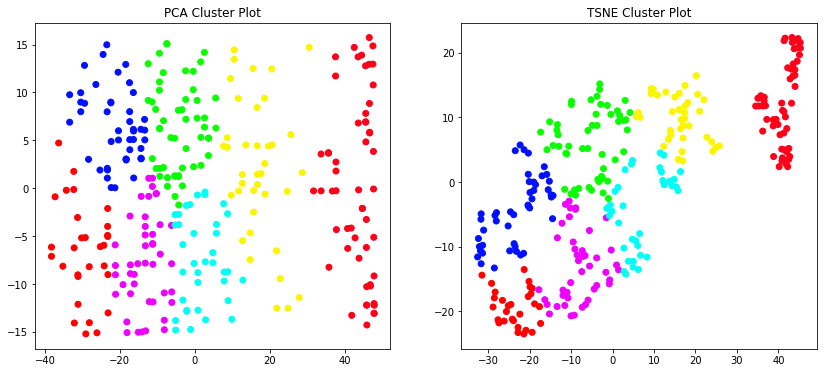

In [88]:
km = KMeans(n_clusters=7)
kme = km.fit(patient_matrix)
plot_tsne_pca(patient_matrix,km.predict(patient_matrix))

In [89]:
patient_data['cluster_label']=km.predict(patient_matrix)

In [87]:
patient_data.head(3)

,EMR_CODE,CLCTBE_FEILD_VALUE1,OPRREGTAA_SEX,OPRREGTAA_AGE,OPRREGTAA_AGE_DAYS,OPRREGTAA_AGE_MONTHS,cluster_label
0,A00000015,i35.1 aortic valve insufficiency,0,19,3.0,4.0,0
1,A00000624,i10 essential primary hypertension,1,50,15.0,0.0,4
2,A00000794,i50 heart failure,1,41,0.0,0.0,4
